# Evaluation of Classification Model

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Task 1: 
A classification model has been created that predicts whether the customer is churn or not. The actual values ​​of 10 test data observations and the probability values ​​predicted by the model are given.
- Create a confusion matrix by taking the threshold value to 0.5.
- Calculate Accuracy, Recall, Precision, F1 Scores.

In [2]:
df = {'actual_value': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
      'model_prob_estimation': [0.7, 0.8, 0.65, 0.9, 0.45, 0.5, 0.55, 0.35, 0.4, 0.25]}
df = pd.DataFrame(df)
df

,actual_value,model_prob_estimation
0,1,0.700
1,1,0.800
2,1,0.650
3,1,0.900
4,1,0.450
5,1,0.500
6,0,0.550
7,0,0.350
8,0,0.400
9,0,0.250


In [3]:
# model_prob_estimation: Model Probability Estimation (probability of belonging to class 1)
y_true = df['actual_value']
y_pred = df['model_prob_estimation']

- Create a confusion matrix by taking the threshold value to 0.5.

In [4]:
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

confusion_matrix(y_true, y_pred)
# TN: 3
# FP: 1 (Type I Error)
# FN: 1 (Type II Error)
# TP: 5

array([[3, 1],
       [1, 5]], dtype=int64)

- Calculate Accuracy, Recall, Precision, F1 Scores.

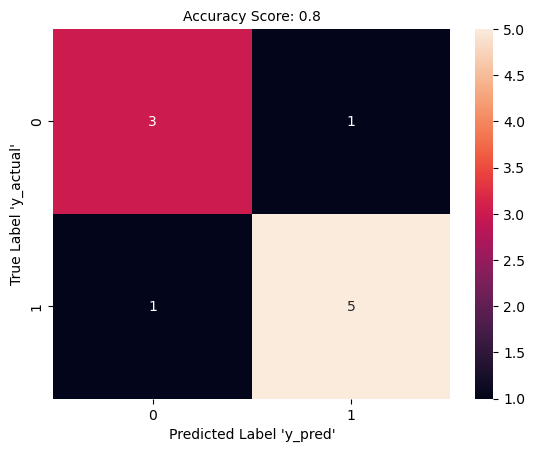

In [5]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f')
    plt.xlabel("Predicted Label 'y_pred'")
    plt.ylabel("True Label 'y_actual'")
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_true, y_pred)

In [6]:
# Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



# Task 2: 
A classification model has been created in order to detect fraudulent transactions during transactions made through the bank. The success of the model with 90.5% accuracy rate was found to be sufficient and the model was taken live. However, after going live, the output of the model was not as expected, and the business unit reported that the model was unsuccessful. The confusion matrix of the prediction results of the model is given below. According to this;

- Calculate Accuracy, Recall, Precision, F1 Scores.
- Comment on what the Data Science team may have overlooked.

Non-Fraud (0), Fraud (1)
- True Negative (TN): 900
- False Positive (FP): 90
- True Positive (TP): 5
- False Negative (FN): 5

In [7]:
# Confusion Matrix
TN = 900
FP = 90
TP = 5
FN = 5

confusion_matrix = np.array([[TN, FP], [FN, TP]])
confusion_matrix = pd.DataFrame(confusion_matrix, columns=['Non-Fraud (0)', 'Fraud (1)'], index=['Non-Fraud (0)', 'Fraud (1)'])
confusion_matrix

,Non-Fraud (0),Fraud (1)
Non-Fraud (0),900,90
Fraud (1),5,5


- Calculate Accuracy, Recall, Precision, F1 Scores.

In [8]:
# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy:.3f}\nRecall: {recall:.3f}\nPrecision: {precision:.3f}\nF1 Score: {f1_score:.3f}')

Accuracy: 0.905
Recall: 0.500
Precision: 0.053
F1 Score: 0.095


- Comment on what the 'Data Science' team may have overlooked.

In [9]:
# Accuracy score output is 90.5%. However, with Precision 5.3%, 
# the model makes errors in False Positive (Type I Error) values ​​and 
# shows 'Non-Fraud' (900) customers as 'Fraud' (90).